# PROJECT ROADMAP
#### 1. Define the number (K) of clusters to the split data into
#### 2. Select K random points within the data
#### 3. Calculate distance between Centroids and other points
#### 4. Assign the points to the closest centroid
#### 5. Calculate the centre of each cluster
#### 6. Repeat Step 3 - 5

### Importing the Libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [65]:
df= pd.read_csv('force2020.csv')
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [66]:
df.dropna(inplace=True)

In [67]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


In [68]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


In [69]:
scaler = StandardScaler()

In [70]:
df[['RHOB_T', 'NPHI_T', 'GR_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'NPHI', 'GR', 'PEF', 'DTC']])

In [71]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,-0.339430,1.157682,0.722114,-1.095690


In [72]:
def optimise_k_means(data, max_k):
    means = []
    inertias =[]
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
        fig =plt.subplots(figsize=(10, 5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel('Number of Cluster')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

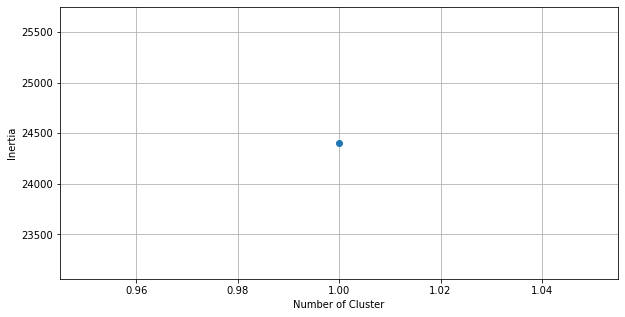

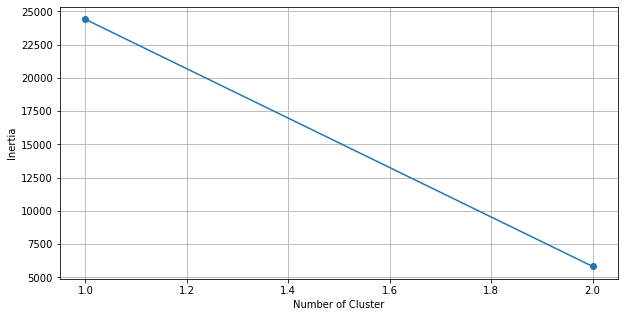

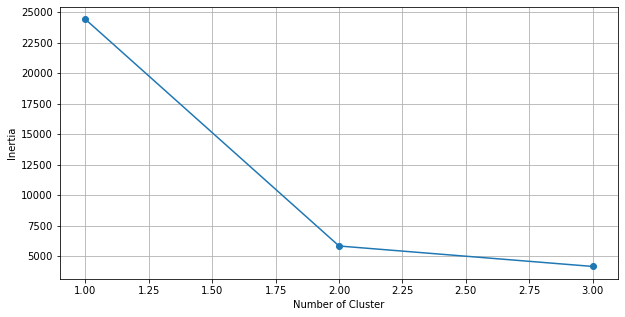

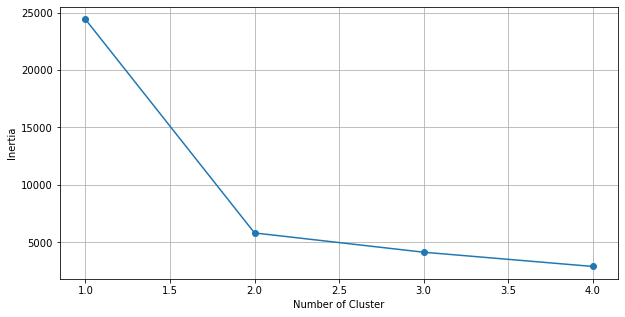

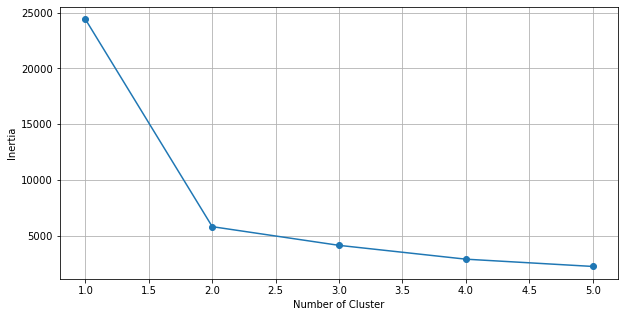

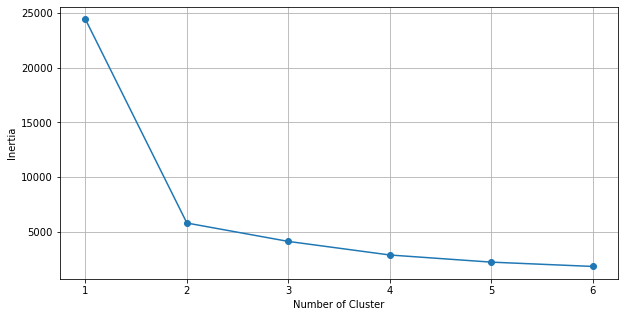

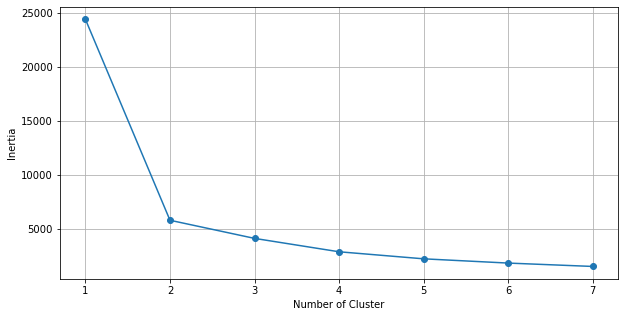

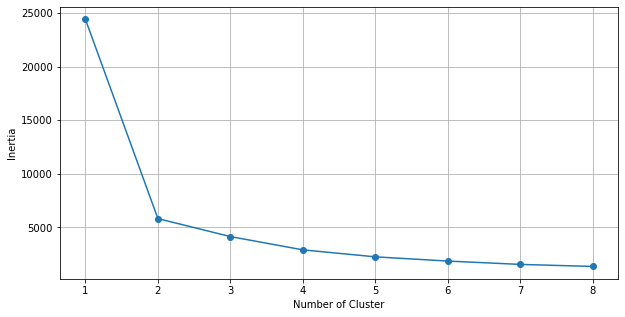

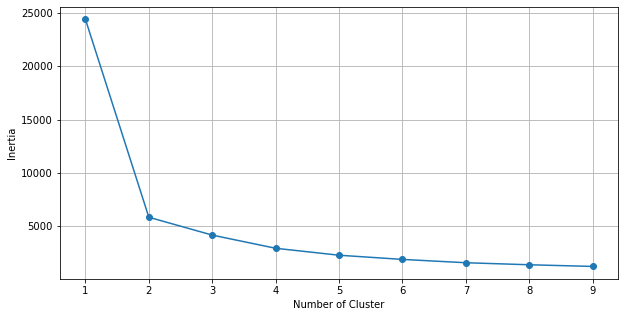

In [73]:
optimise_k_means(df[['RHOB_T', 'NPHI_T']], 10)

In [74]:
kmeans = KMeans(n_clusters =3)

In [75]:
kmeans.fit(df[['NPHI_T', 'RHOB_T']])

KMeans(n_clusters=3)

In [76]:
df['kmeans_3'] =kmeans.labels_

In [77]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,1
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,1
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,1
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,1
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,2
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,2
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,2
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,-0.339430,1.157682,0.722114,-1.095690,2


## Plotting The Results

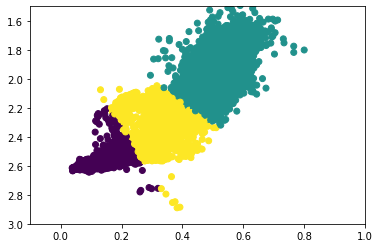

In [78]:
plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmeans_3'])
plt.xlim(-0.1,1)
plt.ylim(3,1.5)
plt.show()

## Creating  Multiple Clusters

In [79]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['RHOB_T', 'NPHI_T']])
    df[f'KMeans_{k}'] = kmeans.labels_
    

In [80]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,1,0,0,1,0,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,1,0,0,1,0,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,1,0,0,1,0,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,1,0,0,1,0,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,2,0,1,2,3,4
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,2,0,1,2,3,4
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,2,0,1,2,3,4
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,-0.339430,1.157682,0.722114,-1.095690,2,0,1,2,3,4


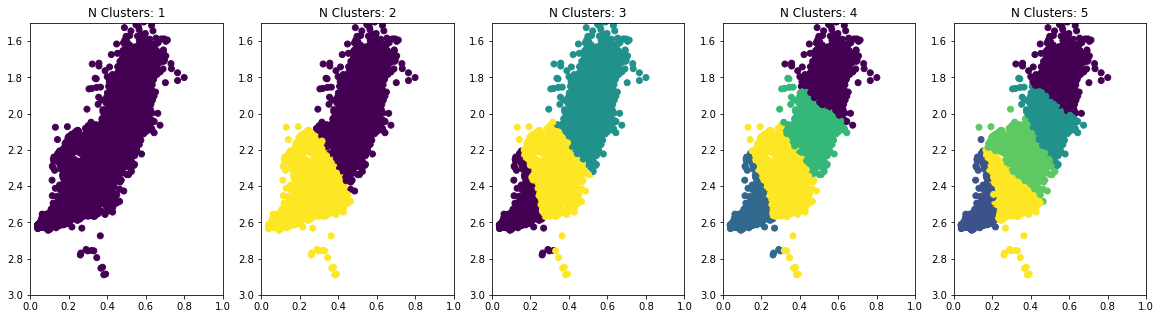

In [82]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['NPHI'], y=df['RHOB'], c=df[f'KMeans_{i}'])
    ax.set_ylim(3,1.5)
    ax.set_xlim(0,1)
    ax.set_title(f'N Clusters: {i}')